In [1]:
import geoplanar
import geopandas

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
j = geopandas.read_file("fullDownload.geojson")

In [3]:
j.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
1,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75867 33.50933, -86.76093 ..."
2,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,"{'5': 'Generally speaking, houses are not buil...","MULTIPOLYGON (((-86.75678 33.49754, -86.75196 ..."
3,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.80111 33.48071, -86.80099 ..."
4,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.74923 33.53332, -86.74916 ..."


In [3]:
j.shape

(7502, 7)

In [4]:
len(j.city.unique())

148

In [5]:
j.groupby(by='holc_grade').count()

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,819,819,233,813,819,819
B,1950,1950,443,1935,1950,1950
C,2960,2960,544,2943,2960,2960
D,1771,1771,296,1750,1771,1771
E,2,2,0,2,2,2


In [6]:
# subset data for California
ca = j[j.state=='CA']

In [7]:
ca.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
114,CA,Fresno,None,A1,A,{'1': 'This is the best residential district i...,"MULTIPOLYGON (((-119.80871 36.77829, -119.8026..."
115,CA,Fresno,None,A2,A,{'1': 'This small area stands out definitely f...,"MULTIPOLYGON (((-119.80451 36.76402, -119.8011..."
116,CA,Fresno,None,B1,B,{'1': 'This is an area comprised entirely of n...,"MULTIPOLYGON (((-119.80355 36.78662, -119.8016..."
117,CA,Fresno,None,B2,B,{'1': 'This area is a very good residential di...,"MULTIPOLYGON (((-119.80111 36.77551, -119.8010..."
118,CA,Fresno,None,B3,B,{'1': 'This area is a comparatively new sub-di...,"MULTIPOLYGON (((-119.74693 36.74631, -119.7423..."


In [9]:
ca.city.unique()

array(['Fresno', 'Los Angeles', 'Oakland', 'Sacramento', 'San Diego',
       'San Francisco', 'San Jose', 'Stockton'], dtype=object)

Subsetting for Oakland to study any potential cartographic issues in the digitalized HOLC maps from 1930.

In [8]:
so = j[j.city=='Sacramento']

In [9]:
so.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
673,CA,Sacramento,East Sacramento,A1,A,"{'0': 'Sacramento, Cal.', '5': 'Development in...","MULTIPOLYGON (((-121.44461 38.56730, -121.4451..."
674,CA,Sacramento,Swanston Park and Land Drive Terrace,A2,A,"{'0': 'Sacramento Ca.', '5': 'Development of a...","MULTIPOLYGON (((-121.49445 38.56091, -121.4938..."
675,CA,Sacramento,College Tract and Land Park Tract,A3,A,"{'0': 'Sacramento, Cal.', '5': 'This area, whi...","MULTIPOLYGON (((-121.50281 38.54785, -121.5019..."
676,CA,Sacramento,Woodlako,B1,B,"{'0': 'Sacramento, Cal.', '5': 'This is a new ...","MULTIPOLYGON (((-121.45428 38.60507, -121.4542..."
677,CA,Sacramento,Maple Park and Homeland,B10,B,"{'0': 'Sacramento, Cal.', '5': 'Maple Park Sec...","MULTIPOLYGON (((-121.49265 38.56130, -121.4920..."


In [10]:
so.shape

(56, 7)

In [11]:
so.groupby(by='holc_grade').count()

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,3,3,3,3,3,3
B,16,16,15,16,16,16
C,30,30,23,30,30,30
D,7,7,6,7,7,7


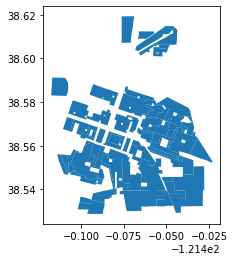

In [12]:
so.plot()

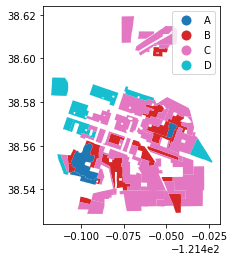

In [13]:
so.plot(column='holc_grade', categorical=True, legend=True)

In [15]:
import contextily as ctx

In [17]:
so= so.to_crs(epsg=3857)

In [18]:
%time img, ext = ctx.bounds2img(*so.total_bounds,12)

CPU times: user 154 ms, sys: 34.9 ms, total: 189 ms
Wall time: 1.46 s


In [19]:
ext

(-13531188.495155042,
 -13511620.615914034,
 4647371.319738718,
 4676723.138600224)

In [20]:
import matplotlib.pyplot as plt

In [21]:
from matplotlib.colors import ListedColormap

In [22]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [25]:
ctx.providers.Stamen.TonerLite

{'url': 'https://stamen-tiles-{s}.a.ssl.fastly.net/{variant}/{z}/{x}/{y}{r}.{ext}',
 'attribution': 'Map tiles by Stamen Design, CC BY 3.0 -- Map data (C) OpenStreetMap contributors',
 'subdomains': 'abcd',
 'min_zoom': 0,
 'max_zoom': 20,
 'variant': 'toner-lite',
 'ext': 'png',
 'name': 'Stamen.TonerLite'}

In [26]:
code_colors = ['darkgreen', 'steelblue', 'yellow', 'firebrick']

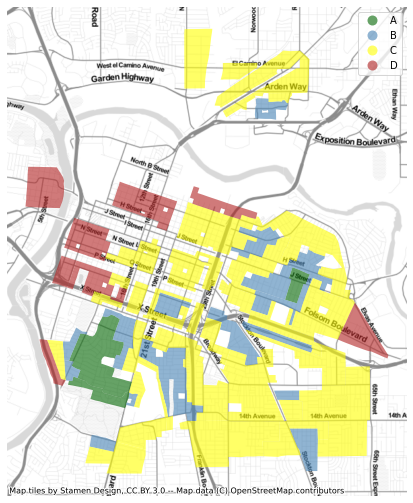

In [27]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
#ax.imshow(img, extent=ext)
# Display airports on top
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
so.plot(ax=ax, column='holc_grade', categorical=True, legend=True, alpha=.6,
            cmap=ListedColormap(code_colors))
ctx.add_basemap(ax, crs=so.crs.to_string(),
               source = ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
# Add title
plt.show()

## Finding the Holes 
- First look at holes for the while Sacramento HOLC map.
- Subset for HOLC grade C for the map.
- Subset for HOLC grade C further into C12 region.

### City of Sacramento 

In [28]:
so_holes = geoplanar.holes(so)
so_holes.total_bounds

array([-13525816.17478455,   4656040.90423611, -13518098.17184887,
         4664937.0116401 ])

In [29]:
so_holes.shape

(30, 3)

There are 30 holes in the Sacramento HOLC map.

#### Omitted Interior Violation: 

- For a planar enforced polygon layer there should be no individual polygons that are contained inside other polygons.
- Violation of this condition can lead to a number of errors in subsequent spatial analysis.


### Subset for Grade C

In [31]:
so.groupby(by='holc_grade').count()
# There are  areas that are marked as D.

,state,city,name,holc_id,area_description_data,geometry,area
holc_grade,,,,,,,
A,3,3,3,3,3,3,3
B,16,16,15,16,16,16,16
C,30,30,23,30,30,30,30
D,7,7,6,7,7,7,7


In [32]:
so_C = so[so.holc_grade=='C']

In [33]:
so_C.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry,area
692,CA,Sacramento,Gardenland,C1,C,"{'0': 'Sacramento, Cal.', '5': 'This outside, ...","MULTIPOLYGON (((-13522669.284 4665552.251, -13...",0.000075
693,CA,Sacramento,None,C10,C,"{'0': 'Sacramento, Cal.', '5': 'An abortive at...","MULTIPOLYGON (((-13518021.918 4660336.211, -13...",0.000031
694,CA,Sacramento,Old City,C11,C,"{'0': 'Sacramento, Cal.', '5': 'This area is p...","MULTIPOLYGON (((-13523420.134 4661166.897, -13...",0.000052
695,CA,Sacramento,Old City,C12,C,"{'0': 'Sacramento, Cal.', '5': 'This area is p...","MULTIPOLYGON (((-13523005.246 4660929.958, -13...",0.000081
696,CA,Sacramento,East Sacramento,C13,C,"{'0': 'Sacramento, Cal.', '5': 'Composed of 17...","MULTIPOLYGON (((-13520422.300 4660655.720, -13...",0.000053


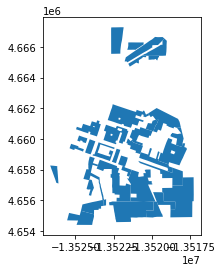

In [36]:
so_C.plot()


In [37]:
so_C_holes = geoplanar.holes(so_C)
so_C_holes.shape

(7, 3)

In [39]:
so_C_holes.total_bounds

array([-13523856.17251015,   4656181.09177741, -13518098.17184887,
         4661393.73093958])

In [40]:
so_C.area.sum()

33509067.364885725

### Subset Data for C12

In [47]:
so_C12 = so_C[so_C.holc_id=='C12']

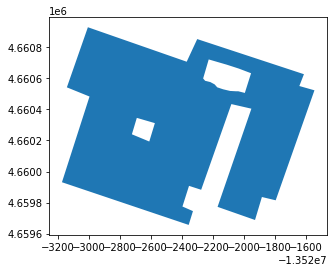

In [48]:
so_C12.plot()

In [50]:
so_C12.geometry.area
# Area with hole

695    1.283804e+06
dtype: float64

In [51]:
so_C12_holes = geoplanar.holes(so_C12)
so_C12_holes.shape

(2, 3)

## Fixing Holes

### Fixing Holes for Subset HOLC C grade

In [52]:
so_C_new = geoplanar.fill_holes(so_C)

/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  neighbors = geopandas.sjoin(left_df=gdf, right_df=rdf, how='inner',
/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  neighbors = geopandas.sjoin(left_df=gdf, right_df=rdf, how='inner',
/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None


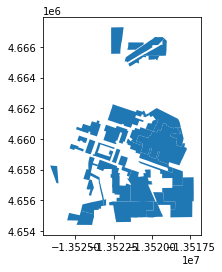

In [53]:
so_C_new.plot()

In [54]:
so_C_new.area.sum()

36706248.05852319

Note: Before and after fixing holes gives us different value for the HOLC grade C data.

### Fixing Hole for Subset HOLC C12 

In [55]:
so_C12_n=geoplanar.fill_holes(so_C12)

/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  neighbors = geopandas.sjoin(left_df=gdf, right_df=rdf, how='inner',
/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  neighbors = geopandas.sjoin(left_df=gdf, right_df=rdf, how='inner',


In [61]:
so_C12_n.area
# Area after fixing holes different from the one with holes

695    1.339707e+06
dtype: float64

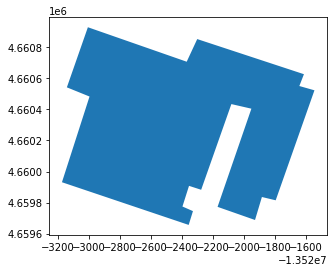

In [57]:
so_C12_n.plot()

We see that the area changes if the holes are fixed. It is important to understand why this particular spot on the map in C12 was left out.

In [58]:
%time img, ext = ctx.bounds2img(*so_C12.total_bounds,12)

CPU times: user 2.32 ms, sys: 1.64 ms, total: 3.96 ms
Wall time: 3.46 ms


In [59]:
ext

(-13531188.495155042,
 -13521404.555534538,
 4657155.259359219,
 4666939.1989797205)

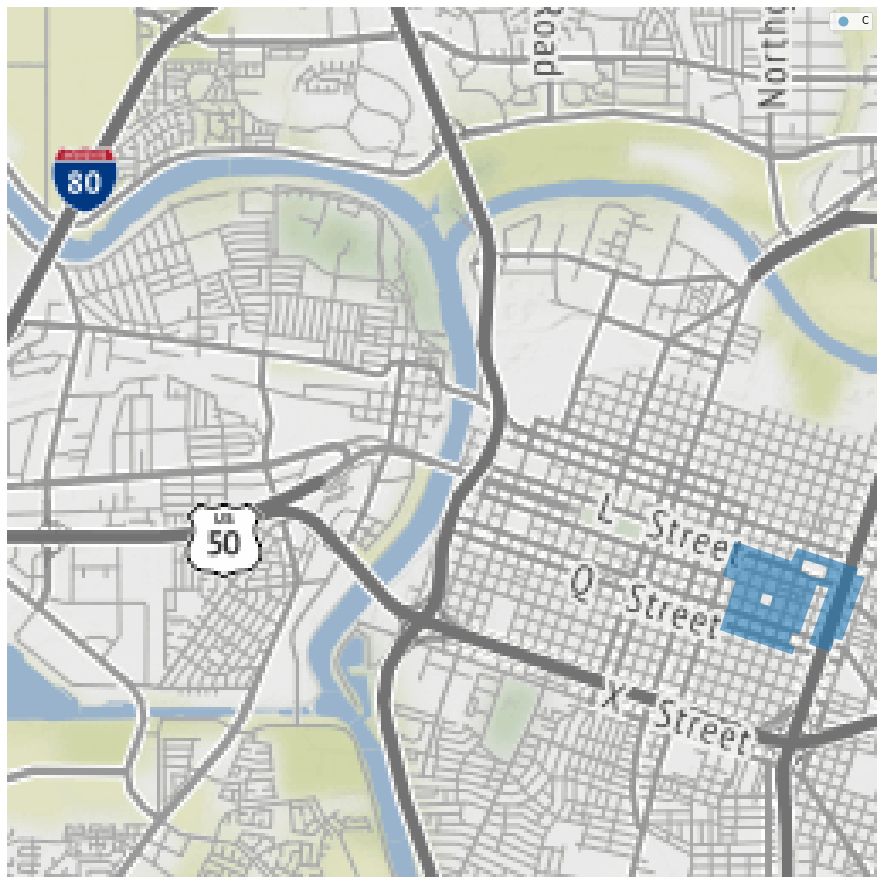

In [60]:
f, ax = plt.subplots(1, figsize=(16, 16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
so_C12.plot(ax=ax, column='holc_grade', categorical=True, legend=True, alpha=.6)
ax.set_axis_off()
# Add title


For reference original HOLC map for Sacramento.


<img src="https://joshbegley.com/redlining/maps/sacramento.jpg" alt="SACRAMENTO"
	title="HOLC MAP" width="750" height="300"  /> 